In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('Dataset/data.csv', encoding= 'unicode_escape')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


# Data Wrangling

## Filtering out Products

In [10]:
# Making StockCode as ProductId
df['productId'] = df['StockCode']

In [11]:
df[df['productId'].apply(lambda x : x[0].isalpha())]['Description'].unique()

array(['POSTAGE', 'Discount', 'CARRIAGE', 'DOTCOM POSTAGE', 'Manual',
       'Bank Charges', 'SAMPLES', 'AMAZON FEE',
       'SUNJAR LED NIGHT NIGHT LIGHT', 'BOXED GLASS ASHTRAY',
       'Dotcomgiftshop Gift Voucher £40.00', 'CAMOUFLAGE DOG COLLAR',
       'Dotcomgiftshop Gift Voucher £50.00',
       'Dotcomgiftshop Gift Voucher £30.00',
       'Dotcomgiftshop Gift Voucher £20.00', nan, 'OOH LA LA DOGS COLLAR',
       'BOYS PARTY BAG', 'GIRLS PARTY BAG',
       'Dotcomgiftshop Gift Voucher £10.00', 'PADS TO MATCH ALL CUSHIONS',
       'HAYNES CAMPER SHOULDER BAG',
       'to push order througha s stock was ', 'ebay', 'Adjust bad debt',
       'CRUK Commission'], dtype=object)

- Most of the products description starting with alphabet does not tell anything about the product

In [12]:
df['productId'].apply(lambda x : x[0].isalpha()).value_counts()

False    538914
True       2995
Name: productId, dtype: int64

- ProductId starting with 
    - digit - 538914
    - alphabet - 2995

In [13]:
# Removing productId starting with alphabet
products = df[df['StockCode'].apply(lambda x : x[0].lower().isdigit())]

In [14]:
products

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,productId
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,85123A
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,71053
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,84406B
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,84029G
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,84029E
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,22613
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,22899
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,23254
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,23255


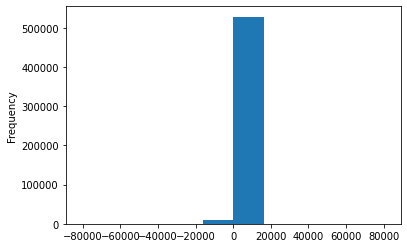

In [15]:
products['Quantity'].plot(kind = 'hist')
plt.show()

In [16]:
# removing quantities less than 0
products = products[products.Quantity > 0]

In [17]:
products.shape

(528886, 9)

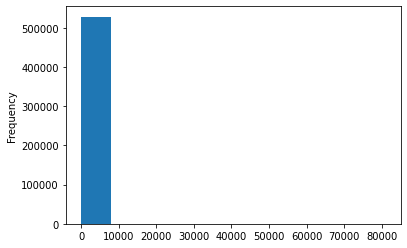

In [18]:
products['Quantity'].plot(kind = 'hist')
plt.show()

In [19]:
products['Quantity'].quantile(0.99)

100.0

In [20]:
sum(products['Quantity']>100)

4937

In [21]:
# Removing top 1% and keeping 99% of the data
products = products[products['Quantity']<=100]

In [22]:
products.shape

(523949, 9)

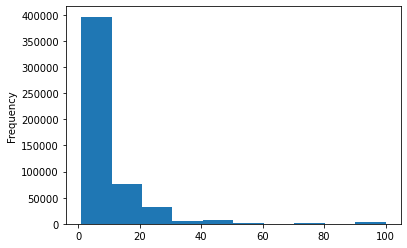

In [23]:
products['Quantity'].plot(kind = 'hist')
plt.show()

In [24]:
sum(products['Quantity'] > 60)

6508

In [25]:
products = products[products['Quantity'] < 60]

In [26]:
products.shape

(516768, 9)

In [27]:
df.shape

(541909, 9)

In [28]:
products.shape[0] / df.shape[0]

0.9536066018464354

In [29]:
products.describe()

,Quantity,UnitPrice,CustomerID
count,516768.000000,516768.000000,384846.000000
mean,6.907990,3.298897,15306.408072
std,8.704129,4.319815,1709.526508
min,1.000000,0.000000,12347.000000
25%,1.000000,1.250000,13982.000000
50%,3.000000,2.100000,15187.000000
75%,10.000000,4.130000,16807.000000
max,59.000000,649.500000,18287.000000


In [30]:
products = products[products['UnitPrice'] > 0]

# Handling missing values

## Description

In [31]:
product_description_count = products.groupby(['productId', 'Description'], sort = False)['InvoiceNo'].count().reset_index()

In [32]:
product_description_count.columns = ['productId', 'Description', 'count']

In [33]:
product_description_count.shape

(4128, 3)

In [34]:
product_description_count = product_description_count.sort_values('count', ascending=False).drop_duplicates('productId')

In [35]:
product_description_count.head()

,productId,Description,count
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2151
516,22423,REGENCY CAKESTAND 3 TIER,1991
344,85099B,JUMBO BAG RED RETROSPOT,1899
1621,47566,PARTY BUNTING,1654
63,20725,LUNCH BAG RED RETROSPOT,1534


In [36]:
product_description_count.shape

(3893, 3)

In [37]:
products.drop('Description', axis = 1, inplace = True)
products = products.merge(product_description_count[['productId', 'Description']], how = 'outer', on='productId')

In [38]:
products.shape

(515758, 9)

In [39]:
products.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Country', 'productId', 'Description'],
      dtype='object')

In [40]:
products.isnull().sum()

InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     130937
Country             0
productId           0
Description         0
dtype: int64

In [41]:
sum(products[products.Description.isnull()]['CustomerID'].isnull())

0

- For 106 null Description values, CustomerID is also Null
- Droppig the rows for particular Values

In [42]:
products = products[~products.Description.isnull()]

In [43]:
products['Description'] = products['Description'].apply(lambda x:x.strip())

## Missing CustomerID

In [44]:
# Handling missing CustomerID using InvoiceNo.
# As single Invoice will belong to single customerID
invoice_customer_count = products.groupby(['InvoiceNo', 'CustomerID'], sort = False)['productId'].count().reset_index()

In [45]:
invoice_customer_count.columns = ['InvoiceNo', 'CustomerID', 'count']

In [46]:
invoice_customer_count.shape

(17628, 3)

In [47]:
invoice_customer_count = invoice_customer_count.sort_values('count', ascending=False).drop_duplicates('InvoiceNo')

In [48]:
invoice_customer_count.shape

(17628, 3)

- There are no duplicates or repeating Invoices

In [49]:
# distribution products sold based on presence or absence of customer
products['custIdPresent'] = pd.notna(products['CustomerID'])

In [50]:
products['custIdPresent'].value_counts(normalize = True)

True     0.746127
False    0.253873
Name: custIdPresent, dtype: float64

In [51]:
products.groupby('custIdPresent')['Quantity'].value_counts()

custIdPresent  Quantity
False          1           73712
               2           23690
               3           10087
               4            6261
               5            3565
                           ...  
True           49              3
               51              3
               57              2
               55              1
               59              1
Name: Quantity, Length: 118, dtype: int64

- When the product is returned, the Quantity is marked as negative
- Cannot remove the Null CustomerID column

- Since we are dealing with Product Segmentation, Null CutomerID won't make any difference

# RFM Analysis and Product Segmentation

## Recency

In [52]:
# currentdate is latest invoiceDate in data
products['date'] = products['InvoiceDate'].dt.date
currentDate = products['date'].max()

In [53]:
currentDate

datetime.date(2011, 12, 9)

In [54]:
# get max purchase date of the product
product_max_date = products.groupby('productId').date.max().reset_index()
product_max_date.columns = ['productId', 'maxPurchaseDate']

# Recency is an indication of how recent the product is sold
product_max_date['recency'] = (currentDate - product_max_date['maxPurchaseDate']) / np.timedelta64(1, 'D')

In [55]:
product_max_date.shape

(3893, 3)

In [56]:
products = products.merge(product_max_date, on = 'productId')

In [57]:
products.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Country', 'productId', 'Description', 'custIdPresent',
       'date', 'maxPurchaseDate', 'recency'],
      dtype='object')

1
2
3
4
5
6
7
8
9
10
11
12
13
14


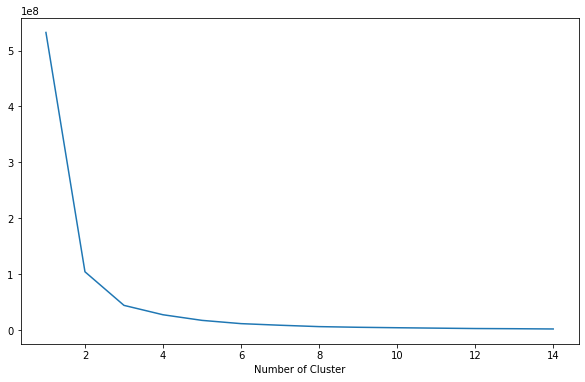

In [58]:
# Applying K-Means for Recency Cluster
from sklearn.cluster import KMeans
sumSquaredError = {}
recency = products[['recency']]

for k in range(1, 15):
    print(k)
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(recency)
    sumSquaredError[k]=kmeans.inertia_

plt.figure(figsize = (10,6))
plt.plot(list(sumSquaredError.keys()), list(sumSquaredError.values()))
plt.xlabel('Number of Cluster')
plt.show()

In [59]:
recency = products[['recency']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(recency)
products['recencyCluster'] = kmeans.predict(recency)

In [60]:
products.groupby('recencyCluster')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
recencyCluster,,,,,,,,
0,483378.0,1.137685,2.891110,0.0,0.0,0.0,1.0,22.0
1,6928.0,121.736721,26.867607,84.0,98.0,120.0,143.0,179.0
2,7019.0,237.216698,42.790115,180.0,206.0,227.0,261.0,373.0
3,18433.0,43.947431,17.488864,23.0,29.0,39.0,56.0,82.0


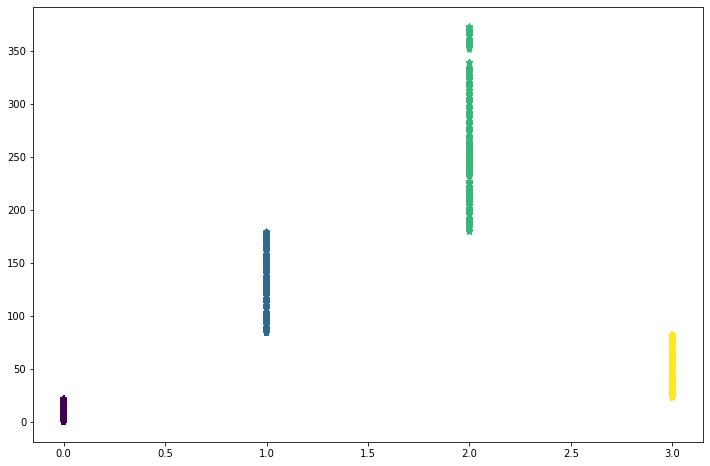

In [61]:
plt.figure(figsize=(12,8))
plt.scatter(products['recencyCluster'], products['recency'], c = products['recencyCluster'], marker = '*')
plt.show()

- **Cluster number is representative of score to that cluster, Recent Article should get higher score**
- Correcting the order of clusters

In [62]:
cluster_df = products.groupby('recencyCluster')['recency'].mean().reset_index()
cluster_df = cluster_df.sort_values('recency', ascending = False).reset_index(drop=True)
cluster_df['new_cluster'] = cluster_df.index
cluster_df.drop('recency', axis = 1, inplace = True)
products = products.merge(cluster_df, on = 'recencyCluster')
products.drop('recencyCluster', axis = 1, inplace = True)
products = products.rename(columns = {'new_cluster' : 'recencyCluster'})
products.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,productId,Description,custIdPresent,date,maxPurchaseDate,recency,recencyCluster
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,True,2010-12-01,2011-12-09,0.0,3
1,536373,85123A,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,True,2010-12-01,2011-12-09,0.0,3
2,536375,85123A,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,True,2010-12-01,2011-12-09,0.0,3
3,536394,85123A,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,True,2010-12-01,2011-12-09,0.0,3
4,536396,85123A,6,2010-12-01 10:51:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,True,2010-12-01,2011-12-09,0.0,3


In [63]:
products.groupby('recencyCluster')['recency'].describe()

,count,mean,std,min,25%,50%,75%,max
recencyCluster,,,,,,,,
0,7019.0,237.216698,42.790115,180.0,206.0,227.0,261.0,373.0
1,6928.0,121.736721,26.867607,84.0,98.0,120.0,143.0,179.0
2,18433.0,43.947431,17.488864,23.0,29.0,39.0,56.0,82.0
3,483378.0,1.137685,2.891110,0.0,0.0,0.0,1.0,22.0


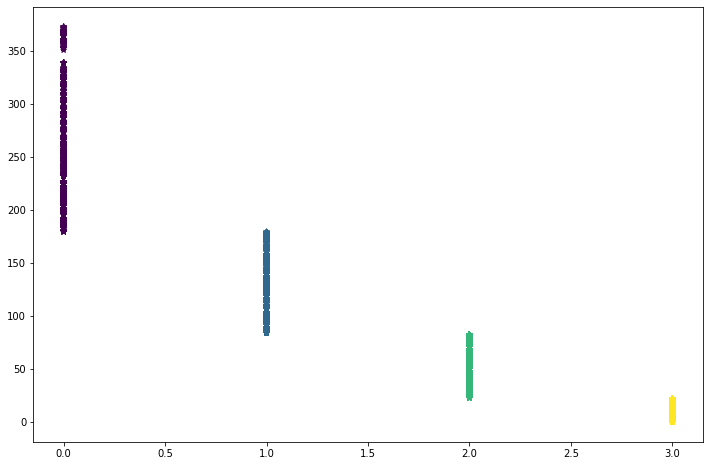

In [64]:
plt.figure(figsize=(12,8))
plt.scatter(products['recencyCluster'], products['recency'], c = products['recencyCluster'], marker = '*')
plt.show()

- The order has been made and the most recent got the highest score

In [65]:
# function for ordering Recency, Frequency and Monetory clusters
def orderClusters(currentCluster, parameter, ascend, data):
    cluster_df = products.groupby(currentCluster)[parameter].mean().reset_index()
    cluster_df = cluster_df.sort_values(parameter, ascending = ascend).reset_index(drop=True)
    cluster_df['new_cluster'] = cluster_df.index
    cluster_df.drop(parameter, axis = 1, inplace = True)
    data = data.merge(cluster_df, on = currentCluster)
    data.drop(currentCluster, axis = 1, inplace = True)
    data = data.rename(columns = {'new_cluster' : currentCluster})
    return data

In [66]:
products = orderClusters('recencyCluster', 'recency', False, products)

## Frequency

In [67]:
frequentProducts = products.groupby('productId')['InvoiceNo'].count().reset_index()
frequentProducts.columns = ['productId', 'frequency']

In [68]:
products = products.merge(frequentProducts, on = 'productId')

1
2
3
4
5
6
7
8
9
10
11
12
13
14


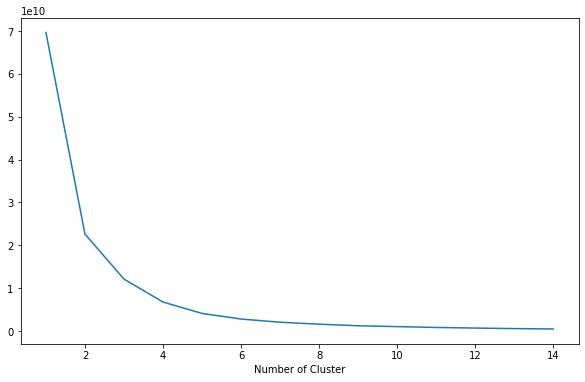

In [69]:
# Applying K-Means for Frequency Cluster
from sklearn.cluster import KMeans
sumSquaredError = {}
frequency = products[['frequency']]

for k in range(1, 15):
    print(k)
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(frequency)
    sumSquaredError[k]=kmeans.inertia_

plt.figure(figsize = (10,6))
plt.plot(list(sumSquaredError.keys()), list(sumSquaredError.values()))
plt.xlabel('Number of Cluster')
plt.show()

In [70]:
frequency = products[['frequency']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(frequency)
products['frequencyCluster'] = kmeans.predict(frequency)

In [71]:
products.groupby('frequencyCluster')['frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
frequencyCluster,,,,,,,,
0,157414.0,480.929053,112.766476,320.0,381.0,456.0,568.0,728.0
1,73361.0,995.675918,178.389422,739.0,832.0,964.0,1144.0,1407.0
2,275745.0,160.967513,84.265513,1.0,92.0,156.0,229.0,319.0
3,9238.0,1875.379303,223.761059,1534.0,1654.0,1899.0,1991.0,2160.0


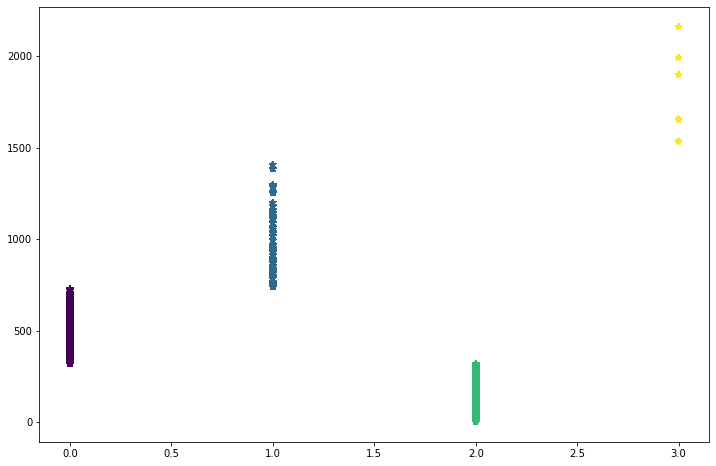

In [72]:
plt.figure(figsize=(12,8))
plt.scatter(products['frequencyCluster'], products['frequency'], c = products['frequencyCluster'], marker = '*')
plt.show()

In [73]:
products = orderClusters('frequencyCluster', 'frequency', True, products)

In [74]:
products.groupby('frequencyCluster')['frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
frequencyCluster,,,,,,,,
0,275745.0,160.967513,84.265513,1.0,92.0,156.0,229.0,319.0
1,157414.0,480.929053,112.766476,320.0,381.0,456.0,568.0,728.0
2,73361.0,995.675918,178.389422,739.0,832.0,964.0,1144.0,1407.0
3,9238.0,1875.379303,223.761059,1534.0,1654.0,1899.0,1991.0,2160.0


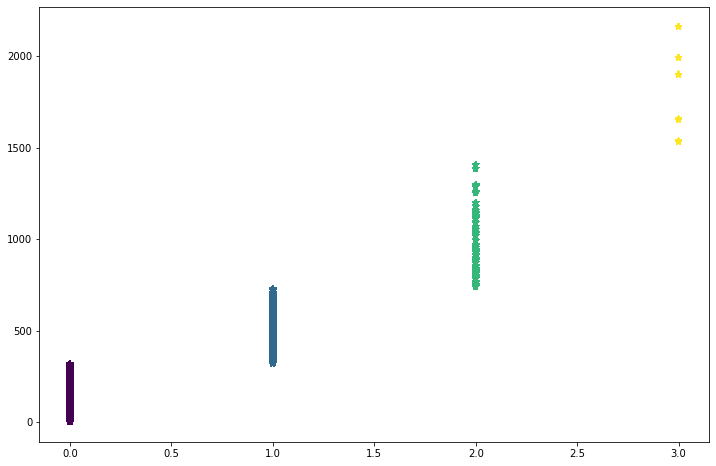

In [75]:
plt.figure(figsize=(12,8))
plt.scatter(products['frequencyCluster'], products['frequency'], c = products['frequencyCluster'], marker = '*')
plt.show()

## Monetary

In [76]:
products['totalPrice'] = products['UnitPrice'] * products['Quantity']

In [77]:
monetaryProducts = products.groupby('productId')['totalPrice'].mean().reset_index()
monetaryProducts.columns = ['productId', 'monetary']
products = products.merge(monetaryProducts, on='productId')

1
2
3
4
5
6
7
8
9
10
11
12
13
14


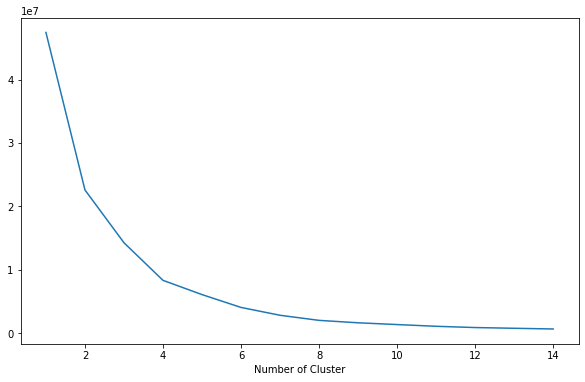

In [78]:
# Applying K-Means for Monetary Cluster
from sklearn.cluster import KMeans
sumSquaredError = {}
monetary = products[['monetary']]

for k in range(1, 15):
    print(k)
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(monetary)
    sumSquaredError[k]=kmeans.inertia_

plt.figure(figsize = (10,6))
plt.plot(list(sumSquaredError.keys()), list(sumSquaredError.values()))
plt.xlabel('Number of Cluster')
plt.show()

In [79]:
monetary = products[['monetary']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(monetary)
products['monetaryCluster'] = kmeans.predict(monetary)

In [80]:
products.groupby('monetaryCluster')['monetary'].describe()

,count,mean,std,min,25%,50%,75%,max
monetaryCluster,,,,,,,,
0,201927.0,16.673366,2.952726,12.215161,14.201380,16.310430,19.049596,23.303253
1,247928.0,7.722057,2.756303,0.418000,5.391626,7.838282,10.153717,12.199302
2,63204.0,30.001139,5.965978,23.389298,25.572694,28.446057,32.467751,54.983714
3,2699.0,80.076199,29.859614,55.717097,71.754008,71.754008,71.754008,303.825000


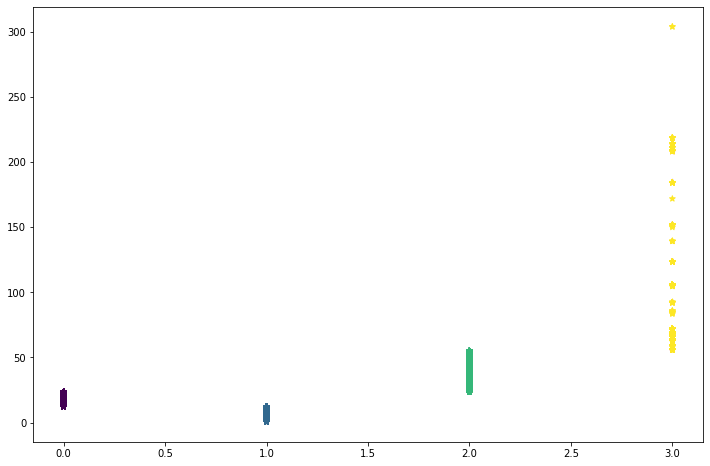

In [81]:
plt.figure(figsize=(12,8))
plt.scatter(products['monetaryCluster'], products['monetary'], c = products['monetaryCluster'], marker = '*')
plt.show()

In [82]:
products = orderClusters('monetaryCluster', 'monetary', True, products)

In [83]:
products.groupby('monetaryCluster')['monetary'].describe()

,count,mean,std,min,25%,50%,75%,max
monetaryCluster,,,,,,,,
0,247928.0,7.722057,2.756303,0.418000,5.391626,7.838282,10.153717,12.199302
1,201927.0,16.673366,2.952726,12.215161,14.201380,16.310430,19.049596,23.303253
2,63204.0,30.001139,5.965978,23.389298,25.572694,28.446057,32.467751,54.983714
3,2699.0,80.076199,29.859614,55.717097,71.754008,71.754008,71.754008,303.825000


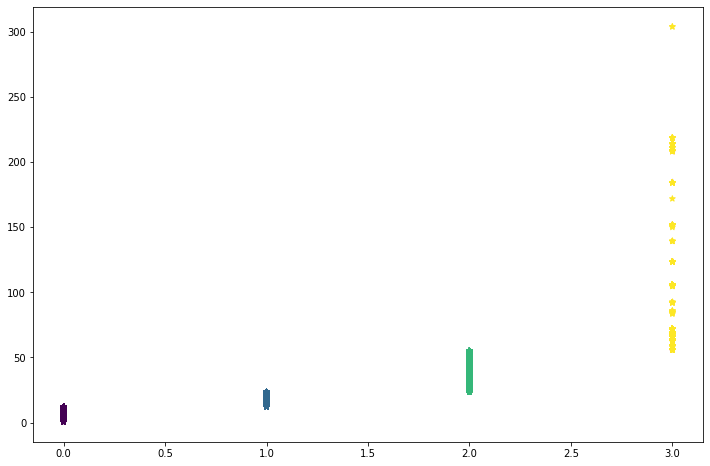

In [84]:
plt.figure(figsize=(12,8))
plt.scatter(products['monetaryCluster'], products['monetary'], c = products['monetaryCluster'], marker = '*')
plt.show()

# Final Score

In [85]:
products['finalScore'] = products['recencyCluster'] + products['frequencyCluster'] + products['monetaryCluster']

In [86]:
products['finalScore'].value_counts(sort=False)

0      4878
1      5132
2     13938
3    158111
4    140105
5     95865
6     76775
7     15149
8      3814
9      1991
Name: finalScore, dtype: int64

In [87]:
productScore = products.drop_duplicates(['productId'])[['productId', 'finalScore']]

In [88]:
productScore = productScore.sort_values('finalScore', ascending=True)

In [89]:
productScore['finalScore'].value_counts(sort = False)

0     342
2     350
4     790
6     116
8       2
1     236
3    1728
5     314
7      14
9       1
Name: finalScore, dtype: int64

## Catgorizing products based on their final score

In [90]:
# best revenue products = final score (6 - 9)
# medium revenue products = final score (3 - 5)
# low revenue products = final score (0 - 2)
products['segment'] = 'low revenue'
products.loc[products['finalScore'] > 2, 'segment'] = 'med revenue'
products.loc[products['finalScore'] > 5, 'segment'] = 'high revenue'

In [91]:
products.drop_duplicates('productId')['segment'].value_counts()

med revenue     2832
low revenue      928
high revenue     133
Name: segment, dtype: int64

**Out of approx. 4000 products 130 products are High Revenue products**

In [92]:
highRevenueProducts = products[products['segment'] == 'high revenue']

In [93]:
highRevenueProducts['Description'].drop_duplicates().tolist()

['WHITE HANGING HEART T-LIGHT HOLDER',
 'PARTY BUNTING',
 'KNITTED UNION FLAG HOT WATER BOTTLE',
 'RED WOOLLY HOTTIE WHITE HEART.',
 'SET 7 BABUSHKA NESTING BOXES',
 'DOORMAT NEW ENGLAND',
 'EDWARDIAN PARASOL RED',
 'WOOD 2 DRAWER CABINET WHITE FINISH',
 'WOOD S/3 CABINET ANT WHITE FINISH',
 'HOT WATER BOTTLE TEA AND SYMPATHY',
 'EDWARDIAN PARASOL NATURAL',
 'DOORMAT FANCY FONT HOME SWEET HOME',
 'WOOD BLACK BOARD ANT WHITE FINISH',
 'ENAMEL FLOWER JUG CREAM',
 'ENAMEL BREAD BIN CREAM',
 'RED RETROSPOT UMBRELLA',
 'RED DINER WALL CLOCK',
 'DELUXE SEWING KIT',
 'DOORMAT FAIRY CAKE',
 'HOT WATER BOTTLE I AM SO POORLY',
 'WHITE SKULL HOT WATER BOTTLE',
 'ASSORTED COLOUR MINI CASES',
 'DOORMAT RED RETROSPOT',
 'DOORMAT HEARTS',
 'ROTATING SILVER ANGELS T-LIGHT HLDR',
 'RED RETROSPOT MINI CASES',
 'CHILLI LIGHTS',
 'RECORD FRAME 7" SINGLE SIZE',
 'VINTAGE UNION JACK BUNTING',
 'PAPER BUNTING WHITE LACE',
 'SWEETHEART CAKESTAND 3 TIER',
 'RED KITCHEN SCALES',
 'WOODEN ROUNDERS GARDEN SET',
 

# Predicting sales of product

## Modeling using Recency, Frequency and Monetary

In [94]:
highRevenueProducts = products[products['segment'] == 'high revenue']

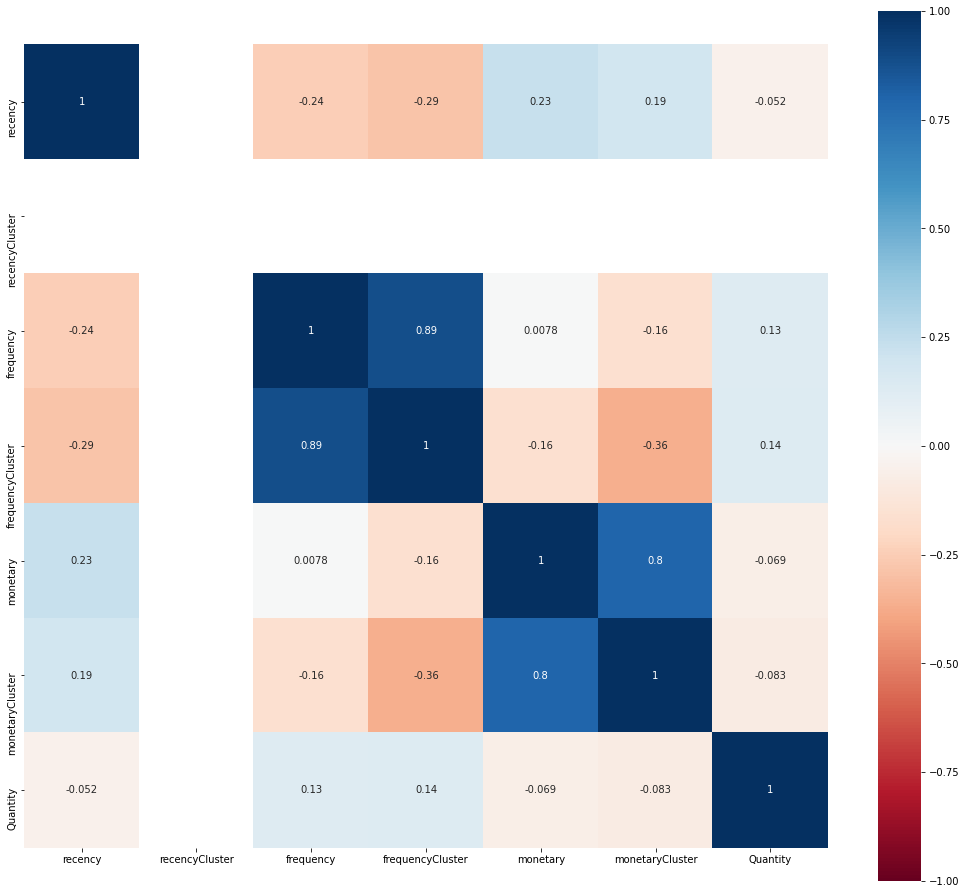

In [95]:
corr_df = highRevenueProducts[['recency', 'recencyCluster', 'frequency', 'frequencyCluster', 
            'monetary', 'monetaryCluster', 'Quantity']]
plt.figure(figsize = (18,16))
sns.heatmap(corr_df.corr(), square=True, annot=True, cmap="RdBu", vmin=-1, vmax=1)
plt.show()

- All features have almost 0 correlation with quanity.
- The result won't be great.

In [96]:
X = highRevenueProducts[['recency', 'recencyCluster', 'frequency',
                         'frequencyCluster', 'monetary', 'monetaryCluster']]
y = highRevenueProducts[['Quantity']]

In [97]:
def create_dummy_variables(X):
    cols = X.columns
    dummy_data = pd.DataFrame()
    for col in cols:
        df_ = pd.get_dummies(X[col], prefix_sep='_', drop_first=True, prefix = col)
        dummy_data = pd.concat([dummy_data, df_], axis = 1)
    return dummy_data

dummy_data = create_dummy_variables(X[['monetaryCluster','frequencyCluster','recencyCluster']])
dummy_data

,monetaryCluster_2,monetaryCluster_3,frequencyCluster_1,frequencyCluster_2,frequencyCluster_3
0,1,0,0,0,1
1,1,0,0,0,1
2,1,0,0,0,1
3,1,0,0,0,1
4,1,0,0,0,1
...,...,...,...,...,...
267596,0,1,0,0,0
267597,0,1,0,0,0
267598,0,1,0,0,0
267599,0,1,0,0,0


In [98]:
X.drop(['recencyCluster', 'frequencyCluster', 'monetaryCluster'], axis = 1, inplace = True)
X = pd.concat([X,dummy_data], axis = 1)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [100]:
r2_score(y_test, y_pred)

0.09289473394627201

- As expected, R-squared score is very low.
- Since the daily purchase of product is not possible, I will change the Target variable from daily sale to weekly sale 

## Feature Engineering

In [101]:
# adding year_week column
products['yearWeek'] = products['InvoiceDate'].apply(lambda x: 100*x.year + int(x.strftime('%V')))

# introducing day of the week into the data
products['weekDay'] = products['InvoiceDate'].dt.weekday

In [102]:
# Median Price of the product
medianPrice = products.groupby("productId").UnitPrice.median().reset_index()
medianPrice.columns = ['productId', 'medianPrice']
products = products.merge(medianPrice, on = ['productId'])

In [103]:
# Median Quantities sold for that product
medianQuantities = products.groupby("productId").Quantity.median().reset_index()
medianQuantities.columns = ['productId', 'medianQuantities']
products = products.merge(medianQuantities, on = ['productId'])

In [104]:
# Customers for that product
customers = products.groupby("productId").CustomerID.nunique().reset_index()
customers.columns = ['productId', 'customers']
products = products.merge(customers, on = ['productId'])

In [105]:
# Total Sales for the product per week - New target
weeklySales = products.groupby(['yearWeek', 'productId'])['Quantity'].sum().reset_index()
weeklySales.columns = ['yearWeek', 'productId', 'weeklySale']
products = products.merge(weeklySales, on = ['yearWeek', 'productId'])

In [106]:
# Median Sales for the product per day of the week
weekDaySales = products.groupby(['weekDay', 'productId'])['Quantity'].median().reset_index()
weekDaySales.columns = ['weekDay', 'productId', 'medianWeekDaySales']
products = products.merge(weekDaySales, on = ['weekDay', 'productId'])

In [108]:
# Weekly Customers 
customers = products.groupby(['yearWeek', 'productId']).CustomerID.nunique().reset_index()
customers.columns = ['yearWeek', 'productId', 'weeklyCustomers']
products = products.merge(customers, on = ['yearWeek', 'productId'])

In [109]:
# Mean Customers per week
products['meanCustomersPerWeek'] = 1
meanCustomers = products.groupby(['productId', 'yearWeek']).meanCustomersPerWeek.count().reset_index()
meanCustomers = meanCustomers.groupby('productId').meanCustomersPerWeek.mean().reset_index()
products.drop('meanCustomersPerWeek', axis = 1, inplace = True)
products = products.merge(meanCustomers, on = ['productId'])

In [110]:
# Median Customers per week
products['medianCustomersPerWeek'] = 1
medianCustomers = products.groupby(['productId', 'yearWeek']).medianCustomersPerWeek.count().reset_index()
medianCustomers = medianCustomers.groupby('productId').medianCustomersPerWeek.median().reset_index()
products.drop('medianCustomersPerWeek', axis = 1, inplace = True)
products = products.merge(medianCustomers, on = ['productId'])

In [111]:
products.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,productId,Description,custIdPresent,date,maxPurchaseDate,recency,recencyCluster,frequency,frequencyCluster,totalPrice,monetary,monetaryCluster,finalScore,segment,yearWeek,weekDay,medianPrice,medianQuantities,customers,weeklySale,medianWeekDaySales,weeklyCustomers,meanCustomersPerWeek,medianCustomersPerWeek
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,True,2010-12-01,2011-12-09,0.0,3,2160,3,15.3,25.853477,2,8,high revenue,201048,2,2.95,6.0,842,378,6.0,30,40.754717,39.0
1,536373,85123A,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,True,2010-12-01,2011-12-09,0.0,3,2160,3,15.3,25.853477,2,8,high revenue,201048,2,2.95,6.0,842,378,6.0,30,40.754717,39.0
2,536375,85123A,6,2010-12-01 09:32:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,True,2010-12-01,2011-12-09,0.0,3,2160,3,15.3,25.853477,2,8,high revenue,201048,2,2.95,6.0,842,378,6.0,30,40.754717,39.0
3,536394,85123A,32,2010-12-01 10:39:00,2.55,13408.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,True,2010-12-01,2011-12-09,0.0,3,2160,3,81.6,25.853477,2,8,high revenue,201048,2,2.95,6.0,842,378,6.0,30,40.754717,39.0
4,536396,85123A,6,2010-12-01 10:51:00,2.55,17850.0,United Kingdom,85123A,WHITE HANGING HEART T-LIGHT HOLDER,True,2010-12-01,2011-12-09,0.0,3,2160,3,15.3,25.853477,2,8,high revenue,201048,2,2.95,6.0,842,378,6.0,30,40.754717,39.0


## Modeling with engineered features

In [112]:
highRevenueProducts = products[products['segment'] == 'high revenue']

In [113]:
highRevenueProducts.columns

Index(['InvoiceNo', 'StockCode', 'Quantity', 'InvoiceDate', 'UnitPrice',
       'CustomerID', 'Country', 'productId', 'Description', 'custIdPresent',
       'date', 'maxPurchaseDate', 'recency', 'recencyCluster', 'frequency',
       'frequencyCluster', 'totalPrice', 'monetary', 'monetaryCluster',
       'finalScore', 'segment', 'yearWeek', 'weekDay', 'medianPrice',
       'medianQuantities', 'customers', 'weeklySale', 'medianWeekDaySales',
       'weeklyCustomers', 'meanCustomersPerWeek', 'medianCustomersPerWeek'],
      dtype='object')

In [114]:
highRevenueProducts.Quantity.describe()

count    97729.000000
mean         6.800254
std          8.198136
min          1.000000
25%          2.000000
50%          4.000000
75%         10.000000
max         59.000000
Name: Quantity, dtype: float64

In [115]:
highRevenueProducts['yearWeek'].value_counts()

201146    3362
201148    3207
201145    3206
201147    3176
201144    2744
201149    2621
201049    2552
201138    2445
201140    2331
201143    2294
201119    2279
201139    2276
201141    2223
201120    2219
201137    2184
201142    2138
201136    2053
201123    2011
201129    1945
201127    1884
201050    1879
201135    1813
201134    1750
201121    1719
201124    1703
201130    1691
201048    1661
201125    1648
201131    1628
201118    1620
201132    1615
201113    1578
201128    1576
201112    1573
201133    1573
201115    1548
201111    1497
201122    1491
201104    1467
201116    1461
201108    1453
201114    1403
201110    1398
201105    1393
201109    1392
201126    1314
201107    1299
201103    1254
201101    1228
201102    1200
201106    1099
201117     946
201051     709
Name: yearWeek, dtype: int64

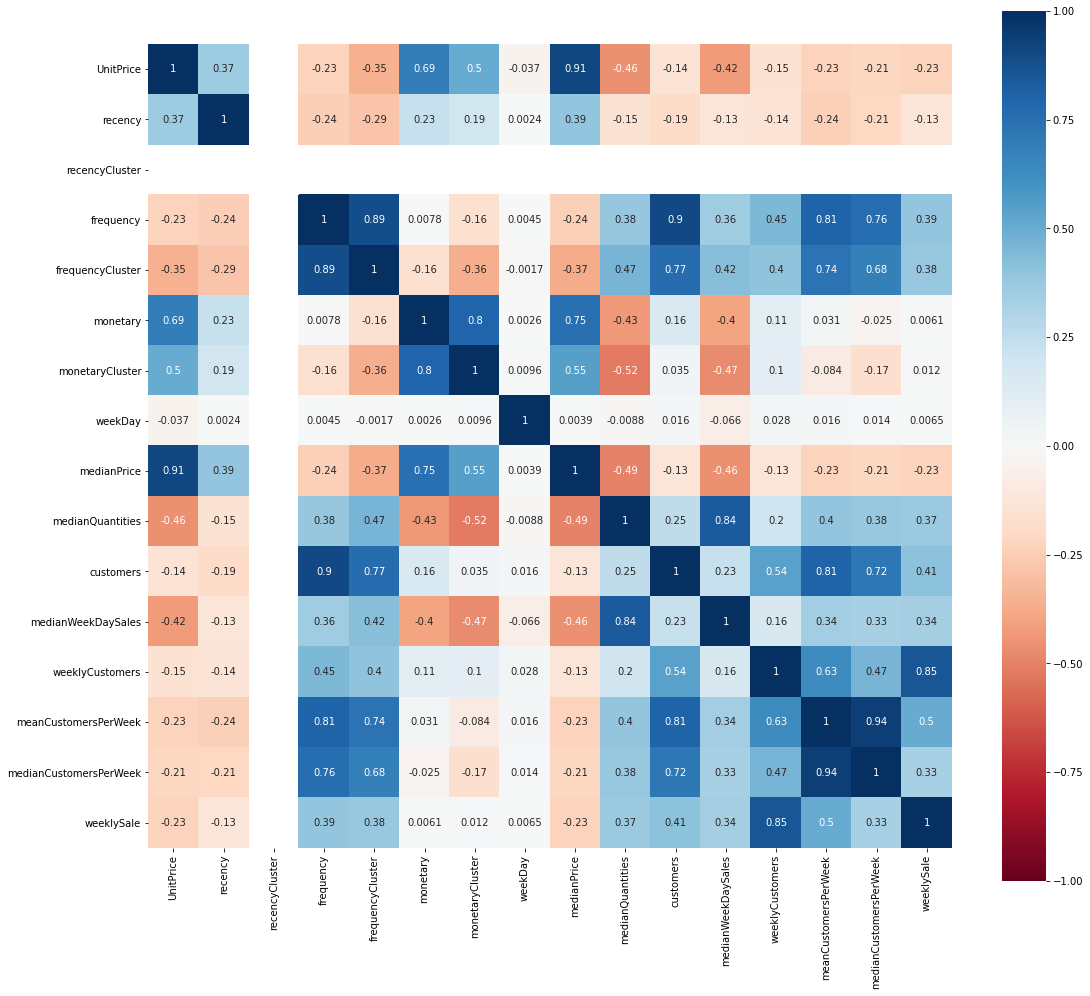

In [116]:
corr_df = highRevenueProducts[['UnitPrice', 'recency', 'recencyCluster', 'frequency',
                         'frequencyCluster', 'monetary', 'monetaryCluster', 
                         'weekDay', 'medianPrice', 'medianQuantities', 
                         'customers', 'medianWeekDaySales','weeklyCustomers', 
                         'meanCustomersPerWeek', 'medianCustomersPerWeek', 'weeklySale']]
plt.figure(figsize = (18,16))
sns.heatmap(corr_df.corr(), square=True, annot=True, cmap="RdBu", vmin=-1, vmax=1)
plt.show()

- Engineered features introduced some correlation 

In [117]:
data = highRevenueProducts[['UnitPrice', 'recency', 'recencyCluster', 'frequency',
                         'frequencyCluster', 'monetary', 'monetaryCluster', 
                         'weekDay', 'medianPrice', 'medianQuantities', 
                         'customers', 'medianWeekDaySales','weeklyCustomers', 
                         'meanCustomersPerWeek', 'medianCustomersPerWeek', 'weeklySale']]

data = data.drop_duplicates()
X = data[['UnitPrice', 'recency', 'recencyCluster', 'frequency',
                         'frequencyCluster', 'monetary', 'monetaryCluster', 
                         'weekDay', 'medianPrice', 'medianQuantities', 
                         'customers', 'medianWeekDaySales','weeklyCustomers', 
                         'meanCustomersPerWeek', 'medianCustomersPerWeek']]
y = data[['weeklySale']]

dummy_data = create_dummy_variables(X[['monetaryCluster','frequencyCluster','recencyCluster', 'weekDay']])
print(dummy_data.head())

X.drop(['recencyCluster', 'frequencyCluster', 'monetaryCluster', 'weekDay'], axis = 1, inplace = True)

X = pd.concat([X,dummy_data], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('R-squared score {}'.format(r2_score(y_test, y_pred)))

    monetaryCluster_2  monetaryCluster_3  ...  weekDay_4  weekDay_6
0                   1                  0  ...          0          0
5                   1                  0  ...          0          0
10                  1                  0  ...          0          0
14                  1                  0  ...          0          0
16                  1                  0  ...          0          0

[5 rows x 10 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


R-squared score 0.9409786066352364


In [118]:
data.shape

(42369, 16)

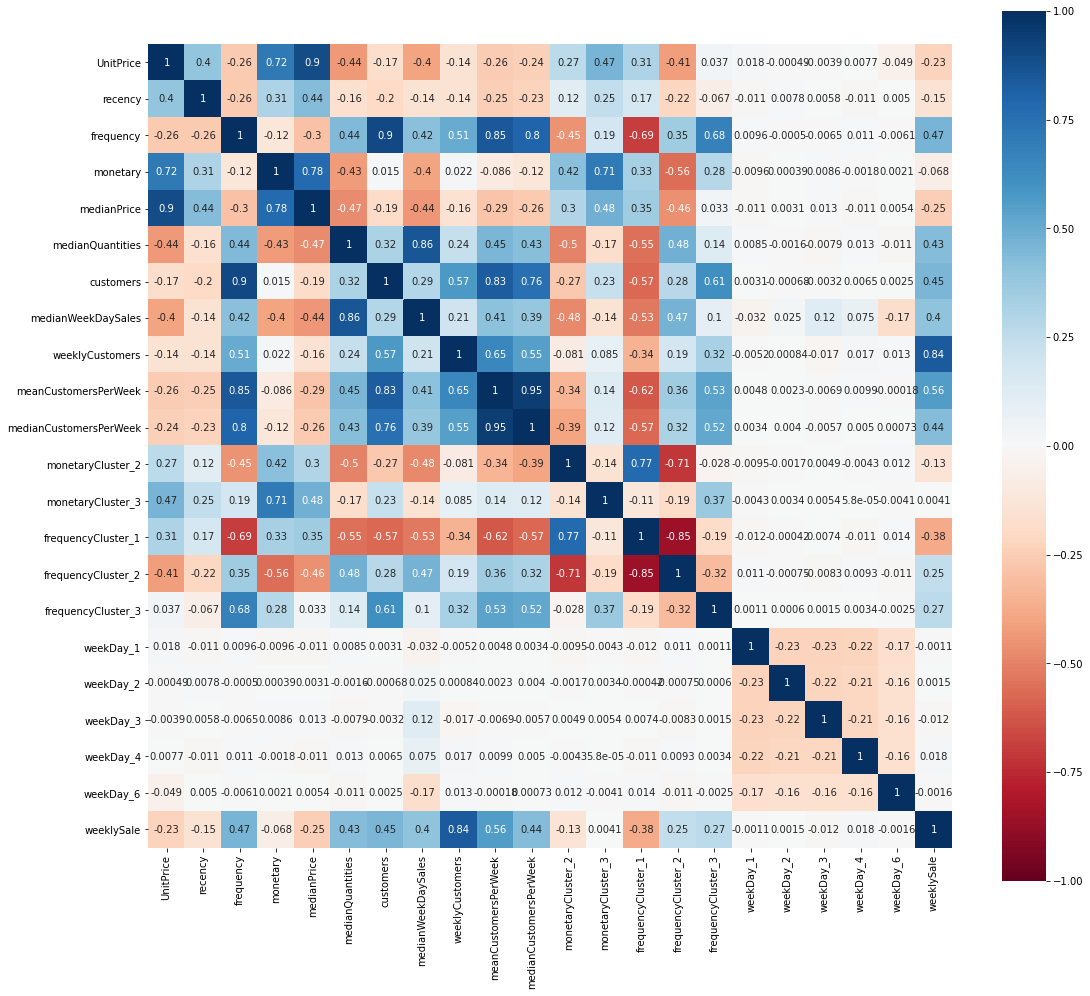

In [119]:
corr_df = pd.concat([X,y], axis= 1)
plt.figure(figsize = (18,16))
sns.heatmap(corr_df.corr(), square=True, annot=True, cmap="RdBu", vmin=-1, vmax=1)
plt.show()

- As expected, **weeklyCustomers** feature helped model to learn about the data.
- While working for future predictions, weeklyCustomers won't be available. Therefore removing **weeklyCustomers** column.
- Since the UnitPrice is volatile, for future predictions, I will be using **medianPrice**

## Removing **weeklyCustomer** Column

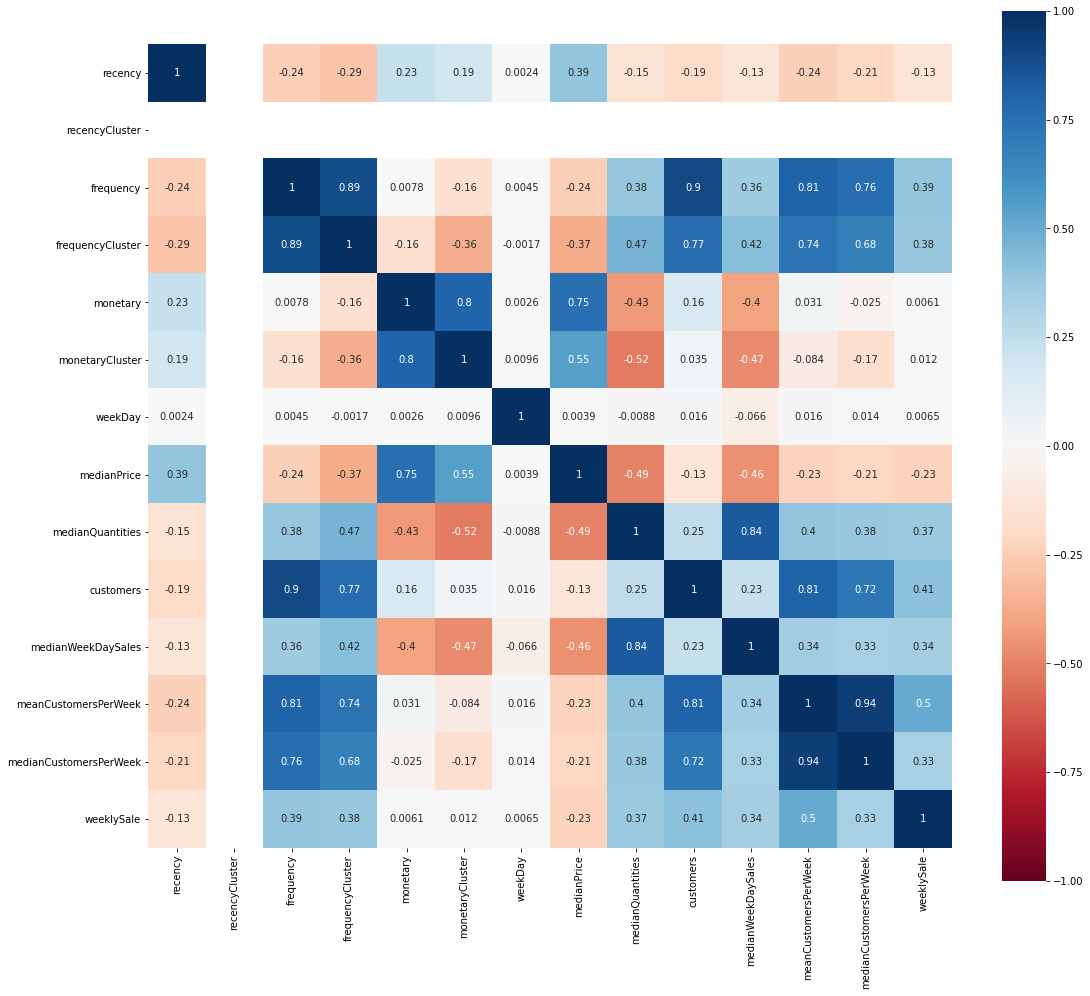

In [196]:
corr_df = highRevenueProducts[['recency', 'recencyCluster', 'frequency',
                         'frequencyCluster', 'monetary', 'monetaryCluster', 
                         'weekDay', 'medianPrice', 'medianQuantities', 
                         'customers', 'medianWeekDaySales', 'meanCustomersPerWeek', 'medianCustomersPerWeek', 'weeklySale']]
plt.figure(figsize = (18,16))
sns.heatmap(corr_df.corr(), square=True, annot=True, cmap="RdBu", vmin=-1, vmax=1)
plt.show()

In [198]:
data = highRevenueProducts[['UnitPrice', 'recency', 'recencyCluster', 'frequency',
                         'frequencyCluster', 'monetary', 'monetaryCluster', 
                         'weekDay', 'medianPrice', 'medianQuantities', 
                         'customers', 'medianWeekDaySales', 
                         'meanCustomersPerWeek', 'medianCustomersPerWeek', 'weeklySale']]

data = data.drop_duplicates()
X = data[['UnitPrice', 'recency', 'recencyCluster', 'frequency',
                         'frequencyCluster', 'monetary', 'monetaryCluster', 
                         'weekDay', 'medianPrice', 'medianQuantities', 
                         'customers', 'medianWeekDaySales', 
                         'meanCustomersPerWeek', 'medianCustomersPerWeek']]
y = data[['weeklySale']]

dummy_data = create_dummy_variables(X[['monetaryCluster','frequencyCluster','recencyCluster', 'weekDay']])
print(dummy_data.head())

X.drop(['recencyCluster', 'frequencyCluster', 'monetaryCluster', 'weekDay'], axis = 1, inplace = True)

X = pd.concat([X,dummy_data], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('R-squared score {}'.format(r2_score(y_test, y_pred)))

    monetaryCluster_2  monetaryCluster_3  ...  weekDay_4  weekDay_6
0                   1                  0  ...          0          0
5                   1                  0  ...          0          0
10                  1                  0  ...          0          0
14                  1                  0  ...          0          0
16                  1                  0  ...          0          0

[5 rows x 10 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


R-squared score 0.47741242716674204


- Removing weeklyCustomers, UnitPrice



In [122]:
data = highRevenueProducts[['recency', 'recencyCluster', 'frequency',
                         'frequencyCluster', 'monetary', 'monetaryCluster', 
                         'weekDay', 'medianPrice', 'medianQuantities', 
                         'customers', 'medianWeekDaySales',
                         'meanCustomersPerWeek', 'medianCustomersPerWeek', 'weeklySale']]

data = data.drop_duplicates()
X = data[['recency', 'recencyCluster', 'frequency',
                         'frequencyCluster', 'monetary', 'monetaryCluster', 
                         'weekDay', 'medianPrice', 'medianQuantities', 
                         'customers', 'medianWeekDaySales', 
                         'meanCustomersPerWeek', 'medianCustomersPerWeek']]
y = data[['weeklySale']]

dummy_data = create_dummy_variables(X[['monetaryCluster','frequencyCluster','recencyCluster', 'weekDay']])
print(dummy_data.head())

X.drop(['recencyCluster', 'frequencyCluster', 'monetaryCluster', 'weekDay'], axis = 1, inplace = True)

X = pd.concat([X,dummy_data], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('R-squared score {}'.format(r2_score(y_test, y_pred)))

    monetaryCluster_2  monetaryCluster_3  ...  weekDay_4  weekDay_6
0                   1                  0  ...          0          0
14                  1                  0  ...          0          0
32                  1                  0  ...          1          0
39                  1                  0  ...          0          1
51                  1                  0  ...          0          0

[5 rows x 10 columns]


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


R-squared score 0.46608755858867146


## Changing train_test_split

- Keeping the last week as test data and rest weeks data as training data

In [123]:
products['yearWeek'].unique()

array([201048, 201049, 201050, 201051, 201101, 201102, 201103, 201104,
       201105, 201106, 201107, 201108, 201109, 201110, 201111, 201112,
       201113, 201114, 201115, 201116, 201117, 201118, 201119, 201120,
       201121, 201122, 201123, 201124, 201125, 201126, 201127, 201128,
       201129, 201130, 201131, 201132, 201133, 201134, 201135, 201136,
       201137, 201138, 201139, 201140, 201141, 201142, 201143, 201144,
       201145, 201146, 201147, 201148, 201149])

In [124]:
train_data = products[products['yearWeek'] != 201149]
train_data = train_data[['productId', 'recency', 'recencyCluster', 'frequency',
                         'frequencyCluster', 'monetary', 'monetaryCluster', 
                         'weekDay', 'medianPrice', 'medianQuantities', 
                         'customers', 'medianWeekDaySales','weeklyCustomers', 
                         'meanCustomersPerWeek', 'medianCustomersPerWeek', 'weeklySale']]
train_data = train_data.drop_duplicates()

test_data = products[products['yearWeek'] == 201149]
test_data = test_data[['productId', 'recency', 'recencyCluster', 'frequency',
                         'frequencyCluster', 'monetary', 'monetaryCluster', 
                         'weekDay', 'medianPrice', 'medianQuantities', 
                         'customers', 'medianWeekDaySales','weeklyCustomers', 
                         'meanCustomersPerWeek', 'medianCustomersPerWeek', 'weeklySale']]
test_data = test_data.drop_duplicates()

train_data.shape, test_data.shape

((246503, 16), (6975, 16))

In [125]:
X_train, y_train = train_data.iloc[:,:-1], train_data[['weeklySale']]
X_train.shape

(246503, 15)

In [126]:
y_test = test_data[['weeklySale']]
y_test.shape

(6975, 1)

In [127]:
sum(train_data.groupby('productId')['medianCustomersPerWeek'].nunique())

3891

In [128]:
# Recency, recencyCluster, frequency, frequencyCluster, monetary, monetaryCluster,
# 'medianPrice', 'medianQuantities', 'customers', 'medianWeekDaySales',
# 'meanCustomersPerWeek', 'medianCustomersPerWeek' - single value for each productId
# 'weeklyCustomers' -  multiple values per week per product
# 'weeklyCustomers' - value will be taken from last week

X_test = test_data[['productId', 'weekDay']]
X_test = X_test.merge(X_train[['productId', 'recency', 'recencyCluster', 'frequency',
       'frequencyCluster', 'monetary', 'monetaryCluster', 'weekDay',
       'medianPrice', 'medianQuantities', 'customers', 'medianWeekDaySales',
       'meanCustomersPerWeek', 'medianCustomersPerWeek']], on = ['productId', 'weekDay'], how = 'left')
X_test = X_test.drop_duplicates()
X_test.head()
X_test.shape

(6975, 14)

In [129]:
last_week = products[products['yearWeek'] == 201148]
last_week = last_week[['productId', 'weeklyCustomers']]
last_week = last_week.drop_duplicates()
last_week.shape

(2291, 2)

In [130]:
X_test = X_test.merge(last_week, on = 'productId', how = 'left')
X_test.shape

(6975, 15)

In [131]:
null_index = X_test[X_test['weeklyCustomers'].isnull()].index.tolist()
null_index = null_index + X_test[X_test['recency'].isnull()].index.tolist()
y_test = y_test.drop(y_test.index[null_index])
X_test = X_test.drop(X_test.index[null_index])
X_test.isnull().sum()
for col in ['recencyCluster', 'frequencyCluster', 'monetaryCluster']:
  X_test[col] = X_test[col].astype(int)

In [132]:
X_train = X_train.loc[:, X_train.columns != 'productId']
X_test = X_test.loc[:, X_test.columns != 'productId']

In [133]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((246503, 14), (246503, 1), (6520, 14), (6520, 1))

In [134]:
dummy_data = create_dummy_variables(X_train[['monetaryCluster','frequencyCluster','recencyCluster', 'weekDay']])
print(dummy_data.head())
X_train.drop(['recencyCluster', 'frequencyCluster', 'monetaryCluster', 'weekDay'], axis = 1, inplace = True)
X_train = pd.concat([X_train,dummy_data], axis = 1)

dummy_data = create_dummy_variables(X_test[['monetaryCluster','frequencyCluster','recencyCluster', 'weekDay']])
print(dummy_data.head())
X_test.drop(['recencyCluster', 'frequencyCluster', 'monetaryCluster', 'weekDay'], axis = 1, inplace = True)
X_test = pd.concat([X_test,dummy_data], axis = 1)

X_train.shape, X_test.shape

    monetaryCluster_1  monetaryCluster_2  ...  weekDay_4  weekDay_6
0                   0                  1  ...          0          0
14                  0                  1  ...          0          0
32                  0                  1  ...          1          0
39                  0                  1  ...          0          1
51                  0                  1  ...          0          0

[5 rows x 14 columns]
   monetaryCluster_1  monetaryCluster_2  ...  weekDay_3  weekDay_4
0                  0                  1  ...          0          0
1                  0                  1  ...          1          0
2                  0                  1  ...          0          1
3                  0                  1  ...          0          0
4                  0                  1  ...          0          0

[5 rows x 10 columns]


((246503, 24), (6520, 20))

In [135]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
  X_test[col] = 0

In [136]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print('R-squared score {}'.format(r2_score(y_test, y_pred)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R-squared score 0.3904590628442923


## Taking median value of weeklyCustomers

In [184]:
train_data = products[products['yearWeek'] != 201149]
train_data = train_data[['productId', 'recency', 'recencyCluster', 'frequency',
                         'frequencyCluster', 'monetary', 'monetaryCluster', 
                         'weekDay', 'medianPrice', 'medianQuantities', 
                         'customers', 'medianWeekDaySales','weeklyCustomers', 
                         'meanCustomersPerWeek', 'medianCustomersPerWeek', 'weeklySale']]
train_data = train_data.drop_duplicates()

test_data = products[products['yearWeek'] == 201149]
test_data = test_data[['productId', 'recency', 'recencyCluster', 'frequency',
                         'frequencyCluster', 'monetary', 'monetaryCluster', 
                         'weekDay', 'medianPrice', 'medianQuantities', 
                         'customers', 'medianWeekDaySales','weeklyCustomers', 
                         'meanCustomersPerWeek', 'medianCustomersPerWeek', 'weeklySale']]
test_data = test_data.drop_duplicates().reset_index(drop = True)

train_data.shape, test_data.shape

((246503, 16), (6975, 16))

In [185]:
X_train, y_train = train_data.iloc[:,:-1], train_data[['weeklySale']]
X_train.shape

(246503, 15)

In [186]:
y_test = test_data[['weeklySale']]
y_test.shape

(6975, 1)

In [187]:
# Recency, recencyCluster, frequency, frequencyCluster, monetary, monetaryCluster,
# 'medianPrice', 'medianQuantities', 'customers', 'medianWeekDaySales',
# 'meanCustomersPerWeek', 'medianCustomersPerWeek' - single value for each productId
# 'weeklyCustomers' -  multiple values per week per product
# 'weeklyCustomers' - value will be taken from last week

X_test = test_data[['productId', 'weekDay']]
X_test = X_test.merge(X_train[['productId', 'recency', 'recencyCluster', 'frequency',
       'frequencyCluster', 'monetary', 'monetaryCluster', 'weekDay',
       'medianPrice', 'medianQuantities', 'customers', 'medianWeekDaySales',
       'meanCustomersPerWeek', 'medianCustomersPerWeek']], on = ['productId', 'weekDay'], how = 'left')
X_test = X_test.drop_duplicates()
print(X_test.head())
X_test.shape

    productId  weekDay  ...  meanCustomersPerWeek  medianCustomersPerWeek
0      85123A        2  ...             40.754717                    39.0
52     85123A        3  ...             40.754717                    39.0
104    85123A        4  ...             40.754717                    39.0
153    85123A        0  ...             40.754717                    39.0
199    85123A        1  ...             40.754717                    39.0

[5 rows x 14 columns]


(6975, 14)

In [188]:
medWeekCustomer = train_data.groupby('productId')['weeklyCustomers'].median().reset_index()
medWeekCustomer.columns = ['productId', 'medWeekCustomer']
X_test = X_test.merge(medWeekCustomer, on = 'productId', how = 'left')
X_test = X_test.drop_duplicates()
X_test = X_test.rename(columns = {'medWeekCustomer' : 'weeklyCustomers'})
X_test.head()
X_test.shape

(6975, 15)

In [189]:
null_index = X_test[X_test['recency'].isnull()].index.tolist()
y_test = y_test.drop(y_test.index[null_index])
X_test = X_test.drop(X_test.index[null_index])
print(X_test.isnull().sum())
for col in ['recencyCluster', 'frequencyCluster', 'monetaryCluster']:
  X_test[col] = X_test[col].astype(int)

productId                 0
weekDay                   0
recency                   0
recencyCluster            0
frequency                 0
frequencyCluster          0
monetary                  0
monetaryCluster           0
medianPrice               0
medianQuantities          0
customers                 0
medianWeekDaySales        0
meanCustomersPerWeek      0
medianCustomersPerWeek    0
weeklyCustomers           0
dtype: int64


In [190]:
X_train = X_train.loc[:, X_train.columns != 'productId']
X_test = X_test.loc[:, X_test.columns != 'productId']

In [191]:
dummy_data = create_dummy_variables(X_train[['monetaryCluster','frequencyCluster','recencyCluster', 'weekDay']])
print(dummy_data.head())
X_train.drop(['recencyCluster', 'frequencyCluster', 'monetaryCluster', 'weekDay'], axis = 1, inplace = True)
X_train = pd.concat([X_train,dummy_data], axis = 1)

dummy_data = create_dummy_variables(X_test[['monetaryCluster','frequencyCluster','recencyCluster', 'weekDay']])
print(dummy_data.head())
X_test.drop(['recencyCluster', 'frequencyCluster', 'monetaryCluster', 'weekDay'], axis = 1, inplace = True)
X_test = pd.concat([X_test,dummy_data], axis = 1)

X_train.shape, X_test.shape

    monetaryCluster_1  monetaryCluster_2  ...  weekDay_4  weekDay_6
0                   0                  1  ...          0          0
14                  0                  1  ...          0          0
32                  0                  1  ...          1          0
39                  0                  1  ...          0          1
51                  0                  1  ...          0          0

[5 rows x 14 columns]
   monetaryCluster_1  monetaryCluster_2  ...  weekDay_3  weekDay_4
0                  0                  1  ...          0          0
1                  0                  1  ...          1          0
2                  0                  1  ...          0          1
3                  0                  1  ...          0          0
4                  0                  1  ...          0          0

[5 rows x 10 columns]


((246503, 24), (6914, 20))

In [192]:
set(X_test.columns) - set(X_train.columns)

set()

In [193]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
  X_test[col] = 0

In [194]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R-squared score 0.40163913692103936


In [195]:
y_pred = rf.predict(X_test)

print('R-squared score {}'.format(r2_score(y_test, y_pred)))

R-squared score 0.40163913692103936
